## This script contains the following:

### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships
 Correlations
 
 Scatterplots
 
 Pair Plots
 
 Categorical Plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
path = r'C:\Users\User\Movie Industry Analysis'

#### Check mathplot version

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Data Cleaning

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'movies.csv'), index_col = False)

In [5]:
df.columns 

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


###  The column "released" contents mixed both date and country. I don't need that and will delete the column

In [7]:
df.drop('released', axis=1, inplace=True)

In [8]:
df.shape

(7668, 14)

### Duplicates

In [9]:
df_dups = df[df.duplicated()]
df_dups

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime


### No duplicates

### Test for mixed data

In [10]:
for col in df.columns.tolist():
  md = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[md]) > 0:
    print (col)


rating
writer
star
country
company


In [11]:
# What is the problem in the "country" column?
df.country.unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', nan, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

### There is no mixed data in country field

### Mixed data in the columns "writer", "star", "country", and "company" will not create problems

In [12]:
# Check rating field
df.rating.unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

### There is no mixed data in rating field

### Test for missing data

In [13]:
df.isnull().sum() 

name           0
rating        77
genre          0
year           0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [14]:
# Clean 'score'
df_clean = df[df['score'].isnull() == False] 

In [15]:
df_clean.shape

(7665, 14)

In [16]:
# Clean 'votes'
df_clean = df_clean[df_clean['votes'].isnull() == False]
df_clean.shape

(7665, 14)

In [17]:
# Clean 'runtime'
df_clean = df_clean[df_clean['runtime'].isnull() == False]
df_clean.shape

(7661, 14)

In [18]:
# Median value for 'gross' 
df_clean['gross'] = df_clean['gross'].fillna(df_clean['gross'].median())

In [19]:
# Clean 'company'
df_clean = df_clean[df_clean['company'].isnull() == False]
df_clean.shape

(7648, 14)

In [20]:
# Clean 'writer'
df_clean = df_clean[df_clean['writer'].isnull() == False]

In [21]:
# Clean 'star'
df_clean = df_clean[df_clean['star'].isnull() == False]

In [22]:
# Clean 'country'
df_clean = df_clean[df_clean['country'].isnull() == False]

In [23]:
# Clean 'rating'
df_clean = df_clean[df_clean['rating'].isnull() == False]

In [24]:
df_clean.isnull().sum() 

name           0
rating         0
genre          0
year           0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2101
gross          0
company        0
runtime        0
dtype: int64

###  2160 values of the 'budget' are missing. I need to enter their values. 

In [25]:
df_clean.describe()

,year,score,votes,budget,gross,runtime
count,7574.000000,7574.000000,7.574000e+03,5.473000e+03,7.574000e+03,7574.000000
mean,2000.377079,6.389345,8.894074e+04,3.571651e+07,7.773570e+07,107.291128
std,11.108858,0.968411,1.640419e+05,4.149261e+07,1.646490e+08,18.584716
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.400000e+03,1.000000e+07,4.843455e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.100000e+07,2.018496e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,4.500000e+07,7.402896e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


###  We see that this variable has a very big range: from 3,000 to 356,000,000.
###  We cannot use the mean values. I will use the median values instead. 

In [26]:
df_clean['budget'].median()

21000000.0

In [27]:
df_clean['budget'] = df_clean['budget'].fillna(df_clean['budget'].median())

In [28]:
df_clean.isnull().sum() 

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### Right now we don't have any missing data. 

In [29]:
# Export the df_clean dataset
# df_clean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index=False)    

### Data profile after cleaning

In [30]:
# Descriptive Statistics
df_clean.describe() 

,year,score,votes,budget,gross,runtime
count,7574.000000,7574.000000,7.574000e+03,7.574000e+03,7.574000e+03,7574.000000
mean,2000.377079,6.389345,8.894074e+04,3.163420e+07,7.773570e+07,107.291128
std,11.108858,0.968411,1.640419e+05,3.588058e+07,1.646490e+08,18.584716
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.400000e+03,1.400000e+07,4.843455e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.100000e+07,2.018496e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,3.200000e+07,7.402896e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


### Considering the min/max values of numerical variables there are no values outside of reasonable range
###    

In [31]:
# data types in a table
df_clean.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
df_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7574 entries, 0 to 7659
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7574 non-null   object 
 1   rating    7574 non-null   object 
 2   genre     7574 non-null   object 
 3   year      7574 non-null   int64  
 4   score     7574 non-null   float64
 5   votes     7574 non-null   float64
 6   director  7574 non-null   object 
 7   writer    7574 non-null   object 
 8   star      7574 non-null   object 
 9   country   7574 non-null   object 
 10  budget    7574 non-null   float64
 11  gross     7574 non-null   float64
 12  company   7574 non-null   object 
 13  runtime   7574 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 887.6+ KB


### Generate correlation matrix

In [33]:
# Create a new dataframe from df_clean contains only numerical values
df_numeric = df_clean.drop(columns=['name', 'rating', 'genre', 'director', 'writer', 'star', 'country', 'company'])

In [34]:
df_numeric.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.295419,0.262153,0.120676
score,0.102346,1.000000,0.411931,0.062640,0.187524,0.400574
votes,0.226895,0.411931,1.000000,0.459061,0.632333,0.309366
budget,0.295419,0.062640,0.459061,1.000000,0.745732,0.273801
gross,0.262153,0.187524,0.632333,0.745732,1.000000,0.244202
runtime,0.120676,0.400574,0.309366,0.273801,0.244202,1.000000


In [35]:
# Export the df_numeric dataset
df_numeric.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_numeric.csv'), index=False)    

In [36]:
# Numbers of unique values
df_clean.nunique()

name        7420
rating        12
genre         18
year          41
score         72
votes        904
director    2899
writer      4474
star        2755
country       59
budget       408
gross       7406
company     2339
runtime      137
dtype: int64

In [37]:
# Modes for columns
modes = df_clean.mode()
modes.head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Anna,R,Comedy,1994,6.6,13000.0,Woody Allen,Woody Allen,Nicolas Cage,United States,21000000.0,20184964.0,Universal Pictures,97.0
1,Fever Pitch,NaN,NaN,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hamlet,NaN,NaN,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hercules,NaN,NaN,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nobody's Fool,NaN,NaN,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pulse,NaN,NaN,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Venom,NaN,NaN,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Medians for columns
print(df_clean.median(numeric_only=True))

year           2000.0
score             6.5
votes         33000.0
budget     21000000.0
gross      20184964.0
runtime         104.0
dtype: float64


## 3. Exploring Relationships

#### Correlations:

In [39]:
df_numeric.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.295419,0.262153,0.120676
score,0.102346,1.000000,0.411931,0.062640,0.187524,0.400574
votes,0.226895,0.411931,1.000000,0.459061,0.632333,0.309366
budget,0.295419,0.062640,0.459061,1.000000,0.745732,0.273801
gross,0.262153,0.187524,0.632333,0.745732,1.000000,0.244202
runtime,0.120676,0.400574,0.309366,0.273801,0.244202,1.000000


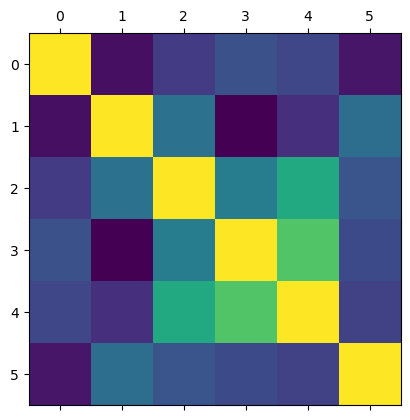

In [40]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_numeric.corr())
plt.show()

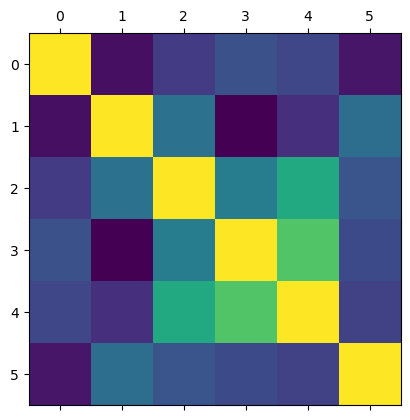

In [41]:
# Save figure 
plt.matshow(df_numeric.corr())
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation heatmap.png'))

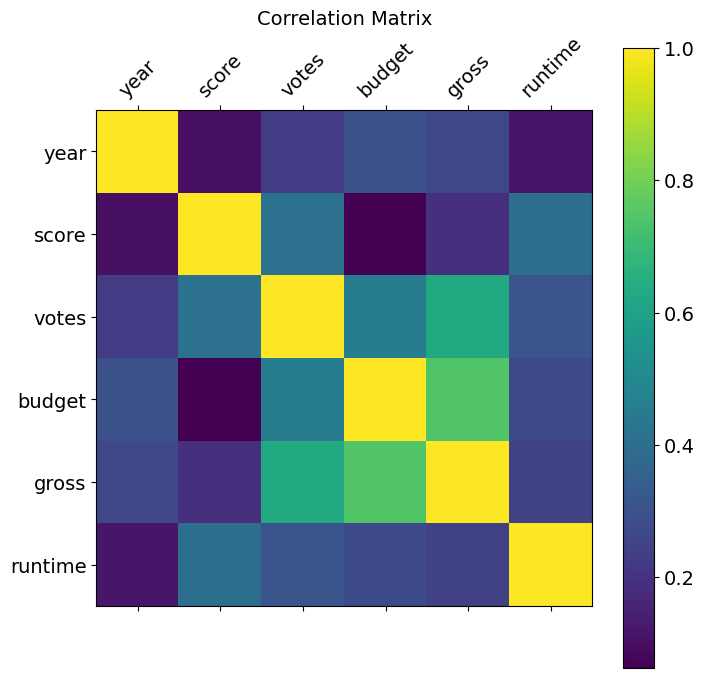

In [50]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation heatmap1.png'))

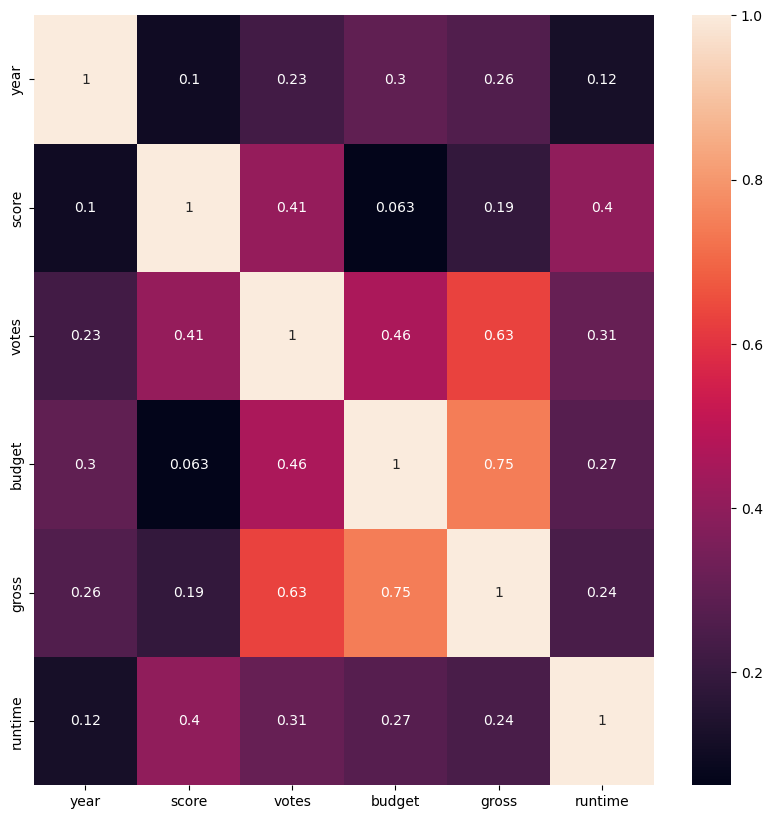

In [51]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
# place the correlation coefficients onto the heatmap.
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation heatmap2.png'))

### Scatterplots

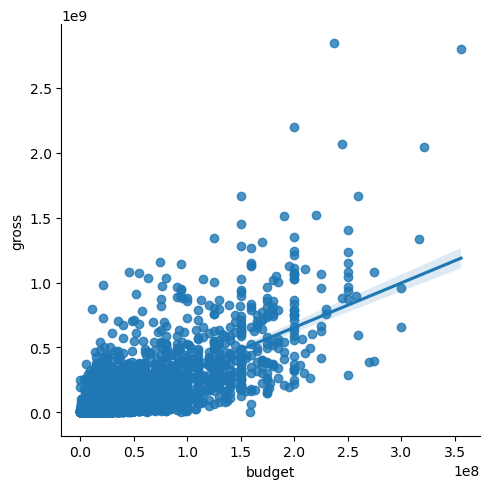

In [53]:
# Create a scatterplot for the "budget" and "gross" columns in seaborn

fig = sns.lmplot(x = 'budget', y = 'gross', data = df_numeric)
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_budget_gross.png'))

### Pair Plots

In [55]:
# Keep only the variables you want to use in the pair plot

df_numeric_1 = df_numeric[['score', 'votes', 'budget', 'gross']]

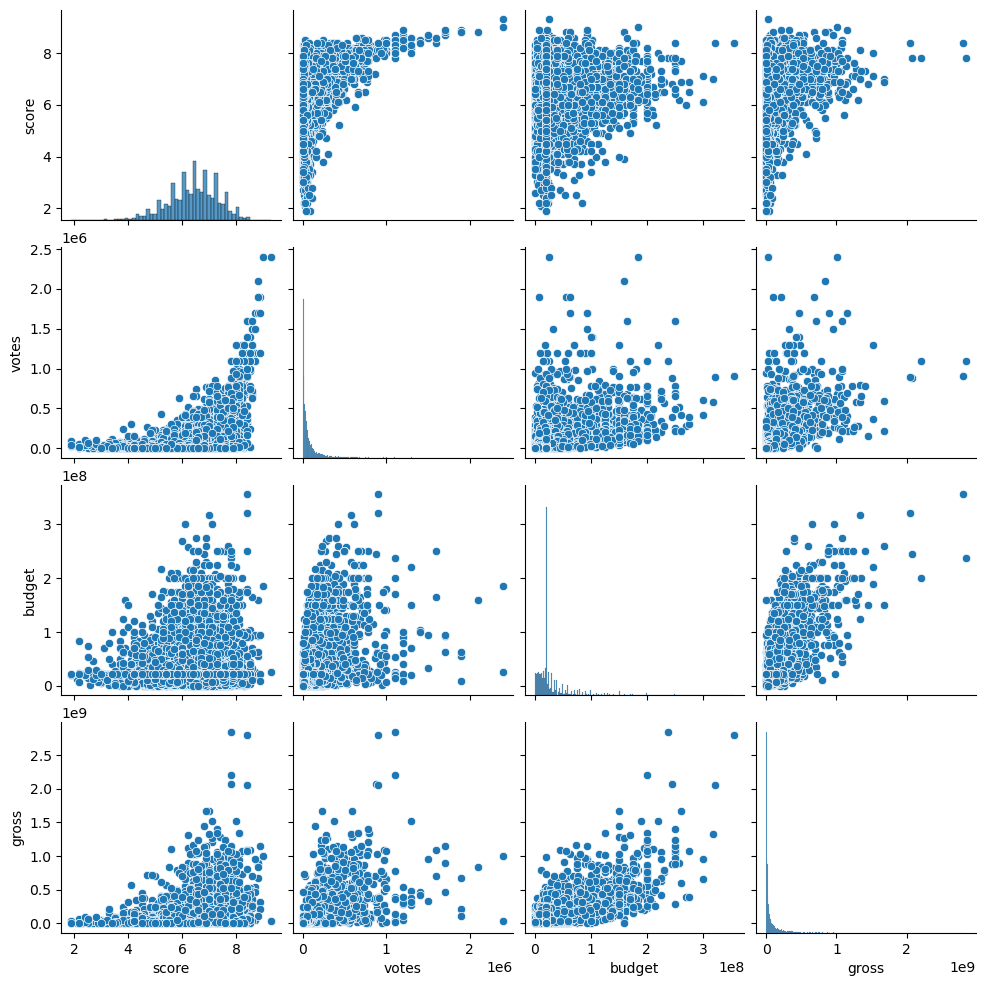

In [61]:
# Create a pair plot 
g = sns.pairplot(df_numeric_1)


In [62]:
g.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_pair.png'))

### Categorical Plots

#### Creating a categorical variable that splits the "runtime" column into categories

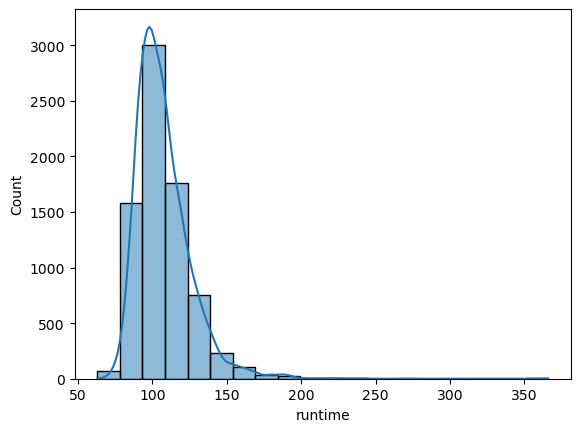

In [72]:
# The argument "kde" add a line that encompasses the distribution
sns.histplot(df_numeric['runtime'], bins = 20, kde = True)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorical_runtime.png'))

In [92]:
df_clean.loc[df_clean['runtime'] < 80, 'Time category'] = 'Short movie'

In [93]:
df_clean.loc[(df_clean['runtime'] >= 80) & (df_clean['runtime'] < 120), 'Time category'] = 'Normal movie'

In [94]:
df_clean.loc[df_clean['runtime']  >= 120, 'Time category'] = 'Long movie'

In [95]:
df_clean['Time category'].value_counts(dropna = False)

Time category
Normal movie    5990
Long movie      1506
Short movie       78
Name: count, dtype: int64

In [98]:
df_clean.columns

Index(['name', 'rating', 'genre', 'year', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'Time category'],
      dtype='object')

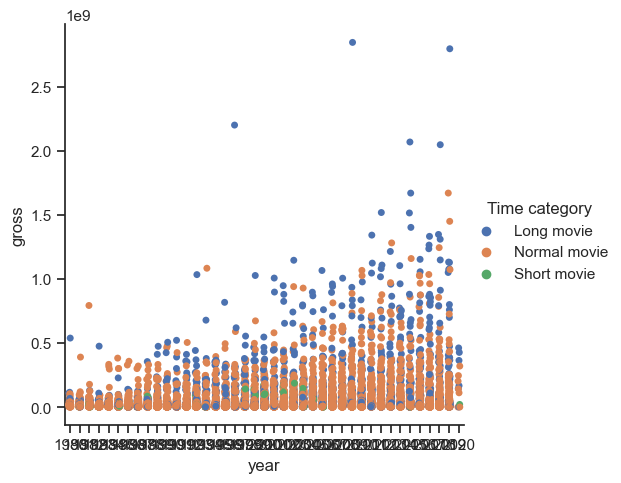

In [102]:
# Create a categorical plot year/gross in seaborn using the runtime categories created above
sns.set(style="ticks")
e = sns.catplot(x="year", y="gross", hue="Time category", data=df_clean)

In [103]:
e.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorical_plot.png'))

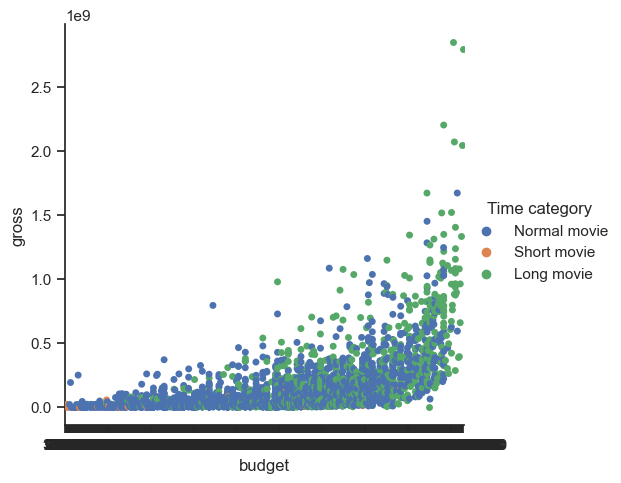

In [104]:
# Create a categorical plot budget/gross in seaborn using the runtime categories created above
sns.set(style="ticks")
k = sns.catplot(x="budget", y="gross", hue="Time category", data=df_clean)

In [105]:
k.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorical_plot1.png'))